Uwaga! Kod poniżej to jedno z ćwiczeń DataCamp (edytowane via [Spyder](https://www.spyder-ide.org/)).

         Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany  
         date          type  year  avg_price   size    nb_sold
0  2015-12-2

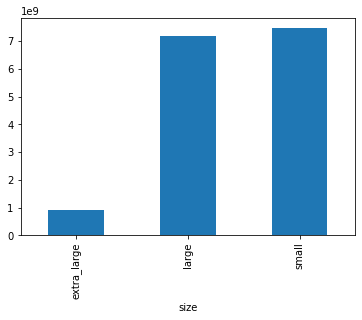

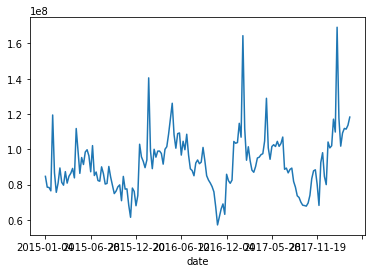

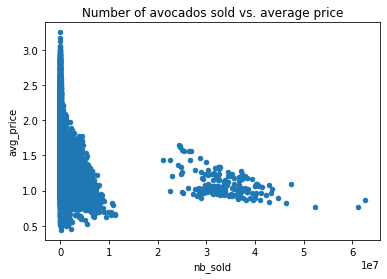

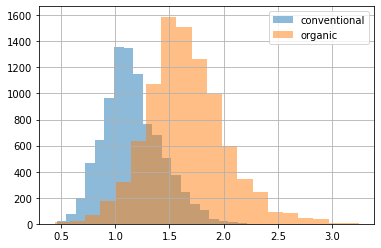

Testing for missing values:
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool
date         0
type         0
year         0
avg_price    0
size         0
nb_sold      0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# *** DataFrame construction begins here. ***

PATH = '/content/drive/MyDrive/Colab Notebooks/Project/datasets'
avocados_csv = pd.read_csv(PATH+'/avocado.csv', index_col=0)
print(avocados_csv.head())

temp_list=[]
for x in avocados_csv['Date']:
    temp_list.append(pd.to_datetime(x).year)
avocados_csv['year']=temp_list

temp_list=[]
for x in avocados_csv['AveragePrice']:
    if x >= 1:
        if np.random.random() < 0.77:
            temp_list.append('small')
        else:
            temp_list.append('large')
    else:
        if np.random.random() <0.8:
            temp_list.append('large')
        else:
            temp_list.append('extra_large')
avocados_csv['size'] = temp_list

avocados = pd.DataFrame(avocados_csv, columns=['Date', 'type', 'year', 'AveragePrice', 'size', 'Total Volume'])
avocados = avocados.rename(columns={'Date':'date', 'AveragePrice':'avg_price', 'Total Volume':'nb_sold'})

# *** DataFrame construction ends here. ***

print(avocados.head())

nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()
print(nb_sold_by_size)
nb_sold_by_size.plot(kind='bar')
plt.show()

nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()
nb_sold_by_date.plot(kind='line')
plt.show()

avocados.plot(x='nb_sold', y='avg_price', kind='scatter', title='Number of avocados sold vs. average price')
plt.show()

avocados[avocados['type'] == 'conventional']['avg_price'].hist(alpha=0.5, bins=20)
avocados[avocados['type'] == 'organic']['avg_price'].hist(alpha=0.5, bins=20)
plt.legend(['conventional', 'organic'])
plt.show()

print('Testing for missing values:')
print(avocados.isna().any())
print(avocados.isna().sum())
avocados.dropna()
avocados.fillna(0)

avocados.to_csv(PATH+'/new_avocado.csv')